In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
dataset = pd.read_csv("Churn.csv", sep=";") #importando os dados

dataset.head() #vizualizando a estrutura de linhas e colunas 

#problemas: nome das colunas 
#ANÁLISE EXPLORATÓRIA DOS DADOS: Iremos vizualizar nossos dados e identificar os problemas, desvios e erros 

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
dataset.shape #temos 999 linhas e 12 colunas, e o shape é utilizado para sabermos o tamanho da nossa tabelab

(999, 12)

In [6]:
dataset.rename(columns = {'X0' : 'Id' , 'X1': 'Score', 'X2': 'Estado' , 'X3': 'Genero' , 'X4' : 'Idade', 'X4.1': 'Patrimonio' , 'X6': 'Saldo', "X7": "Produtos", 'X8': 'TemCartCredito', 'X9': 'Ativo' , 'X10' : 'Salario', 'X11': "Saiu"}, inplace = True)

In [7]:
dataset.head() #com as colunas renomeadas, vemos que possuimos algumas colunas booleanas expressas numericamente 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [8]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

#nao existem os estados RP, TD e SP não é um estado do sul (definido pela regra do meu negócio), entao eles precisam ser excluídos
#nesse caso, vamos utilizar a regra da MODA, ou seja, substituir os estados com erro pelo estado que mais aparece (RS)b

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

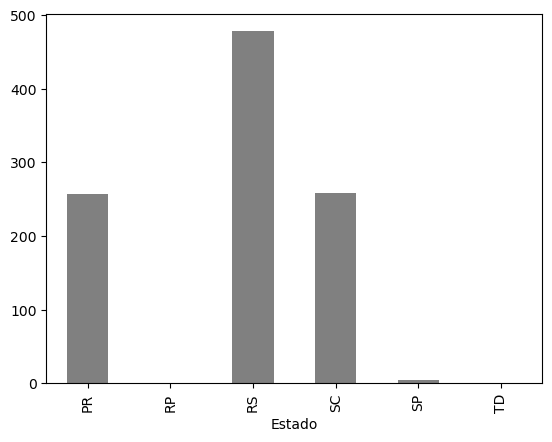

In [9]:
agrupado.plot.bar(color = 'gray')

In [10]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

#observamos que nesse caso, f e o fem devem ser unificados com o feminino, e o M com o masculino

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

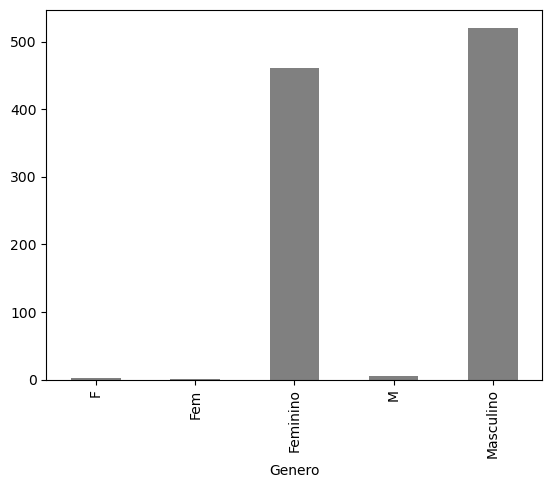

In [11]:
agrupado.plot.bar(color = 'gray')

In [12]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

#com a função describe, vemos a média (mean), a mediana (50%, o que indica que não existem muitos outliers nos dados)
#vemos que o mín é 376, logo nao existe um score 0

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

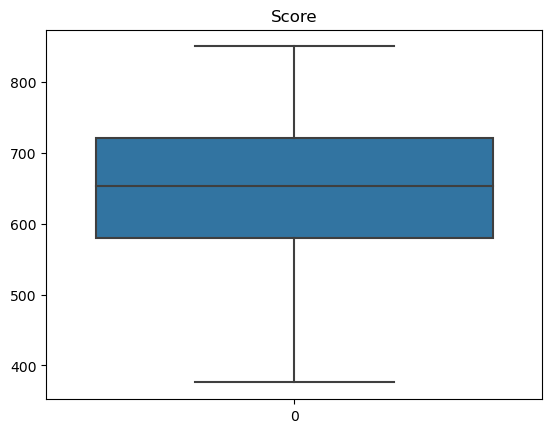

In [13]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

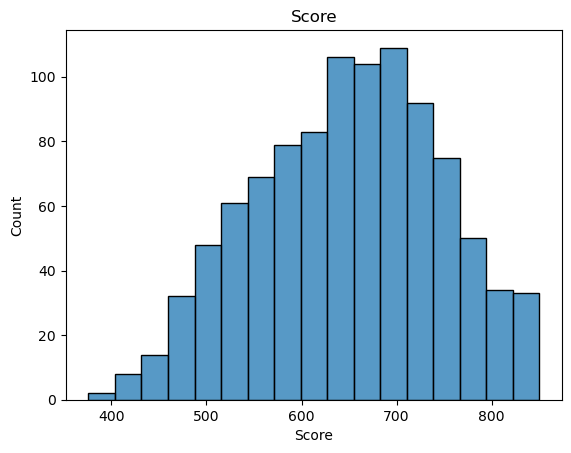

In [16]:
srn.histplot(dataset['Score']).set_title('Score') #vizualiamos por histograma

In [17]:
#idade
dataset['Idade'].describe()

#achamos um problema: temos idades negativas e idades irreais (140)

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

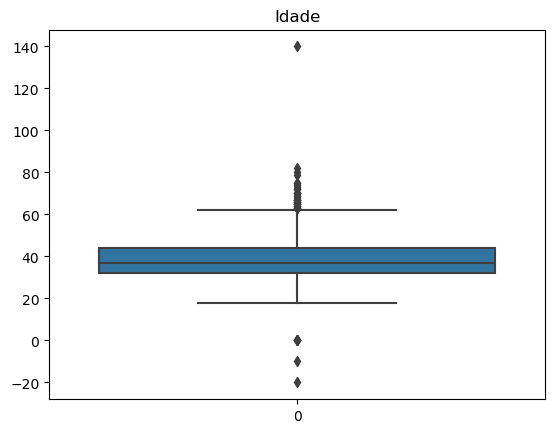

In [18]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

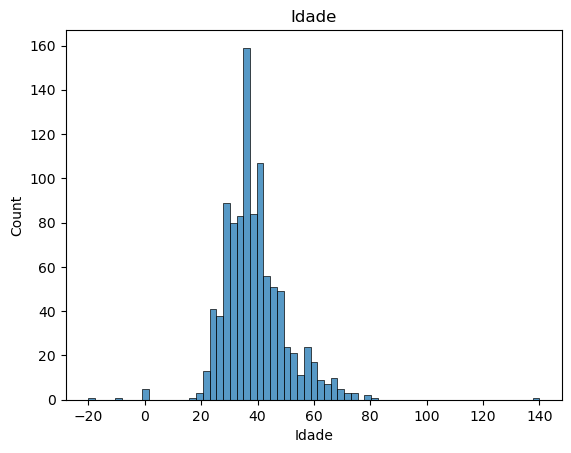

In [20]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [22]:
#saldo
dataset['Saldo'].describe()


count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

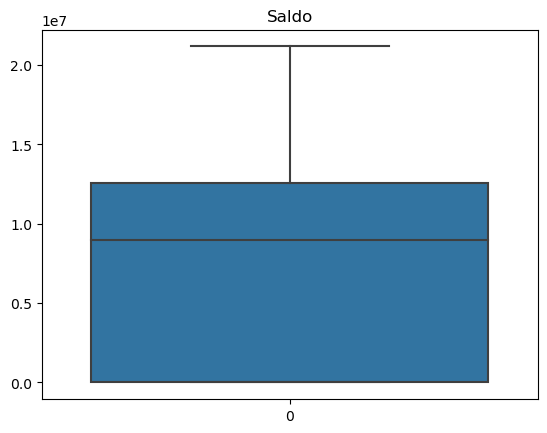

In [23]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

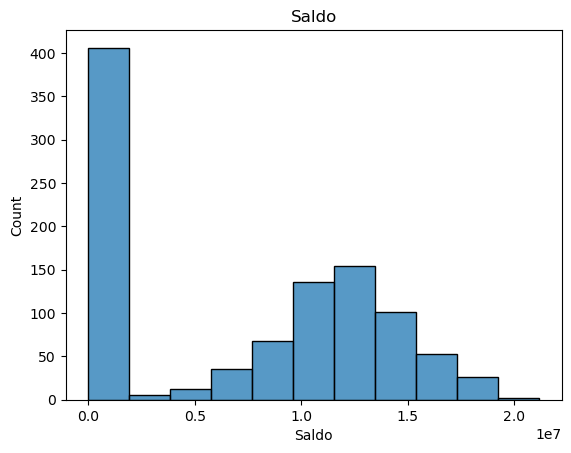

In [25]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

In [26]:
#salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

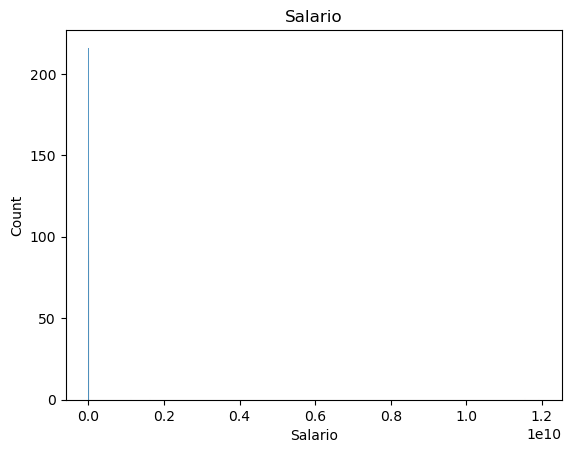

In [30]:
srn.histplot(dataset['Salario']).set_title('Salario')

In [31]:
#contamos valores NAN
#genero e salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [32]:
#AQUI COMEÇA O TRATAMENTO DOS DADOS
#salarios
#remover nas e substiutir pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [33]:
#vamos calcular a mediana dos salários primeiro
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [35]:
#substituir NAN por mediana
#fillna = substitua valores oficialmente

dataset['Salario'].fillna(mediana, inplace=True)

In [36]:
#vamos conferir se deu certo
#primeiro tratamento de dados realizado
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [37]:
#genero, falta de padronização e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [38]:
#total de Nas da coluna genero
dataset['Genero'].isnull().sum()

8

In [39]:
#nesse caso de classificação, devemos preencher NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [40]:
#verificamos novamente NANs
dataset['Genero'].isnull().sum()

0

In [41]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino" #se a coluna genero for igual a 'M', atribua Genero à Masculino
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino" #se a coluna genero ESTIVER EM (isin = operador de conjunto) fem ou F, atribua genero à feminino
#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [42]:
#idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [43]:
#visualizar nossos outliers  
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [44]:
#calcular a mediana da idade, vamos usar a mediana pois a mediana está menos sujeita a alterações de outliers como a média
mediana = sts.median(dataset['Idade'])
mediana

37

In [45]:
#substituir os outliers pela mediana
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [46]:
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [47]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [48]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [49]:
#estado foram do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [50]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [51]:
#verificamos o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [52]:
#outliers em salário, vamos considerar 2 desvios padrão
#aqui vamos calcular o desvio padraob
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [53]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [54]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [55]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [56]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [57]:
dataset.shape

(998, 12)